In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
read_df = pd.read_csv(Path('../Data/cleaned_adoptions2020_2021.csv'))

In [3]:
read_df.head()

,id,name,url,type,primary_breed,seondary_breed,mixed_breed,unknown_breed,primary_color,secondary_color,...,state,postcode,country,adopt_date,post_date,adoption_days,breed_count,tag_input,photo_input,description_input
0,50175720,Remy,https://www.petfinder.com/dog/remy-50175720/ga...,Dog,Speciality,NaN,False,False,"Tricolor (Brown, Black, & White)",NaN,...,GA,30127,US,2021-02-02,2020-12-31,33,169,True,True,True
1,50175862,Peapod*little hiking buddy,https://www.petfinder.com/dog/peapod-star-litt...,Dog,Chihuahua,NaN,True,False,Golden,NaN,...,CA,95945,US,2021-02-06,2020-12-31,37,2773,False,True,True
2,50175865,Pups,https://www.petfinder.com/dog/pups-50175865/md...,Dog,Mixed Breed,NaN,True,False,Unanswered,NaN,...,MD,20637,US,2021-01-03,2020-12-31,3,2618,False,True,True
3,50175869,Macy--NEEDS A QUIET HOME,https://www.petfinder.com/dog/macy-needs-a-qui...,Dog,Speciality,Lhasa Apso,True,False,White / Cream,NaN,...,TN,37064,US,2021-01-16,2020-12-31,16,195,False,True,True
4,50175868,Rachel,https://www.petfinder.com/dog/rachel-50175868/...,Dog,Chihuahua,NaN,False,False,Brown / Chocolate,NaN,...,CA,95948,US,2021-01-08,2020-12-31,8,2773,False,True,True


In [4]:
# Columns from our Original Dataset

for x in read_df.columns:
    print(x)

id
name
url
type
primary_breed
seondary_breed
mixed_breed
unknown_breed
primary_color
secondary_color
age
gender
size
coat
house_trained
spayed_neutered
special_needs
shots_current
gw_children
gw_dogs
gw_cats
tags
description
photo_urls
status
status_changed_at
published_at
city
state
postcode
country
adopt_date
post_date
adoption_days
breed_count
tag_input
photo_input
description_input


In [12]:
# Creating 6 bins to classify which adoption bin to place dogs into.

bins = [-1,30,60,90,500]

classifier=['0','1','2','3']
# ageCategory = ["same_day","first_week","first_month","three_months","six_months","longer"]

read_df["adoption_bin"] = pd.cut(read_df["adoption_days"], bins, labels = classifier)

In [19]:
read_df["adoption_bin"].value_counts()

0    31537
1     5280
3     2888
2     1791
Name: adoption_bin, dtype: int64

In [13]:
# Created a subset of our original dataframe with only the columns that we wanted.

model_df = read_df[['primary_breed','mixed_breed','unknown_breed','primary_color','age','gender','size','coat','house_trained','spayed_neutered','special_needs','shots_current','gw_children','gw_dogs','gw_cats','tag_input','photo_input','description_input','adoption_bin']]

# Separate our data frame into features and target

X = model_df.drop(['adoption_bin'], axis=1)
y = model_df['adoption_bin']


In [14]:
# Using get_dummies to convert our data to numeric

X_dummies = pd.get_dummies(X)

X_dummies = X_dummies.drop(['unknown_breed','description_input'], axis=1)

In [15]:
X_dummies

,mixed_breed,house_trained,spayed_neutered,special_needs,shots_current,tag_input,photo_input,primary_breed_American Bulldog,primary_breed_American Staffordshire Terrier,primary_breed_Australian Cattle Dog / Blue Heeler,...,coat_Wire,gw_children_False,gw_children_True,gw_children_Unanswered,gw_dogs_False,gw_dogs_True,gw_dogs_Unanswered,gw_cats_False,gw_cats_True,gw_cats_Unanswered
0,False,True,True,False,True,True,True,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,True,True,True,False,True,False,True,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,True,False,False,False,True,False,True,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,True,True,True,False,True,False,True,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,False,False,False,False,False,False,True,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41491,True,False,False,False,False,False,True,0,0,0,...,0,0,0,1,0,0,1,0,0,1
41492,True,False,True,False,True,False,True,0,0,0,...,0,0,1,0,0,1,0,0,1,0
41493,True,True,True,False,True,False,True,0,0,0,...,0,0,0,1,0,0,1,1,0,0
41494,True,True,True,False,True,False,True,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [16]:
for x in X_dummies.columns:
    print(x)

mixed_breed
house_trained
spayed_neutered
special_needs
shots_current
tag_input
photo_input
primary_breed_American Bulldog
primary_breed_American Staffordshire Terrier
primary_breed_Australian Cattle Dog / Blue Heeler
primary_breed_Australian Shepherd
primary_breed_Beagle
primary_breed_Black Labrador Retriever
primary_breed_Border Collie
primary_breed_Boxer
primary_breed_Catahoula Leopard Dog
primary_breed_Cattle Dog
primary_breed_Chihuahua
primary_breed_Dachshund
primary_breed_German Shepherd Dog
primary_breed_Great Dane
primary_breed_Great Pyrenees
primary_breed_Hound
primary_breed_Husky
primary_breed_Jack Russell Terrier
primary_breed_Labrador Retriever
primary_breed_Miniature Pinscher
primary_breed_Mixed Breed
primary_breed_Pit Bull Terrier
primary_breed_Retriever
primary_breed_Rottweiler
primary_breed_Shepherd
primary_breed_Shih Tzu
primary_breed_Siberian Husky
primary_breed_Speciality
primary_breed_Terrier
primary_breed_Yorkshire Terrier
primary_color_Apricot / Beige
primary_colo

In [17]:
# Split our data into a training set and a testing set

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [18]:
# Train a Random Forest Classifier model and print the model score

clf_scaled = RandomForestClassifier(random_state=1, n_estimators=100)
clf_scaled.fit(X_train, y_train)

print(f"Training Data Score: {clf_scaled.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_scaled.score(X_test, y_test)}")

Training Data Score: 0.9595784332626438
Testing Data Score: 0.7833044148833622


# Optimization Attempt

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

n_estimators =[20,40,60,80,100,120,140,160,180,200,220,240,260,280,300]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [21]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier(random_state=1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200, 220, 240, 260,
                                                         280, 300]},
                   random_state=1, verbose=2)

In [24]:
# List the best parameters for this dataset

print(rf_random.best_params_)

{'n_estimators': 260, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [25]:
clf_scaled = RandomForestClassifier(random_state=1, n_estimators = 260, min_samples_split = 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= True)
clf_scaled.fit(X_train, y_train)

print(f"Training Data Score: {clf_scaled.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_scaled.score(X_test, y_test)}")

Training Data Score: 0.9487500803290277
Testing Data Score: 0.7873529978793137


# Feature Importances

In [26]:
feature_importances = clf_scaled.feature_importances_
feature_importances

array([0.04111903, 0.03026579, 0.02929662, 0.0114416 , 0.02294656,
       0.02666733, 0.00406427, 0.00492817, 0.00696952, 0.00669077,
       0.00485499, 0.00752456, 0.00295442, 0.00575538, 0.009026  ,
       0.0034743 , 0.00462015, 0.01038724, 0.0066433 , 0.01064658,
       0.00259537, 0.00325662, 0.00934712, 0.00637703, 0.00394851,
       0.01768743, 0.00207291, 0.01231835, 0.01403074, 0.00270544,
       0.00418397, 0.00989382, 0.00298916, 0.00344295, 0.02806437,
       0.01240038, 0.00243354, 0.01371797, 0.01481348, 0.0291685 ,
       0.01331234, 0.01848048, 0.00885989, 0.01148106, 0.00197744,
       0.00306339, 0.002037  , 0.01195153, 0.0031406 , 0.0149935 ,
       0.02483123, 0.01905547, 0.01353199, 0.01753063, 0.01677241,
       0.00956043, 0.01560584, 0.03089663, 0.03050676, 0.00405134,
       0.01667178, 0.02108726, 0.01422722, 0.00250175, 0.00064859,
       0.00859604, 0.02266573, 0.029461  , 0.02495222, 0.00329466,
       0.0112076 , 0.01930268, 0.01904379, 0.01030222, 0.01669

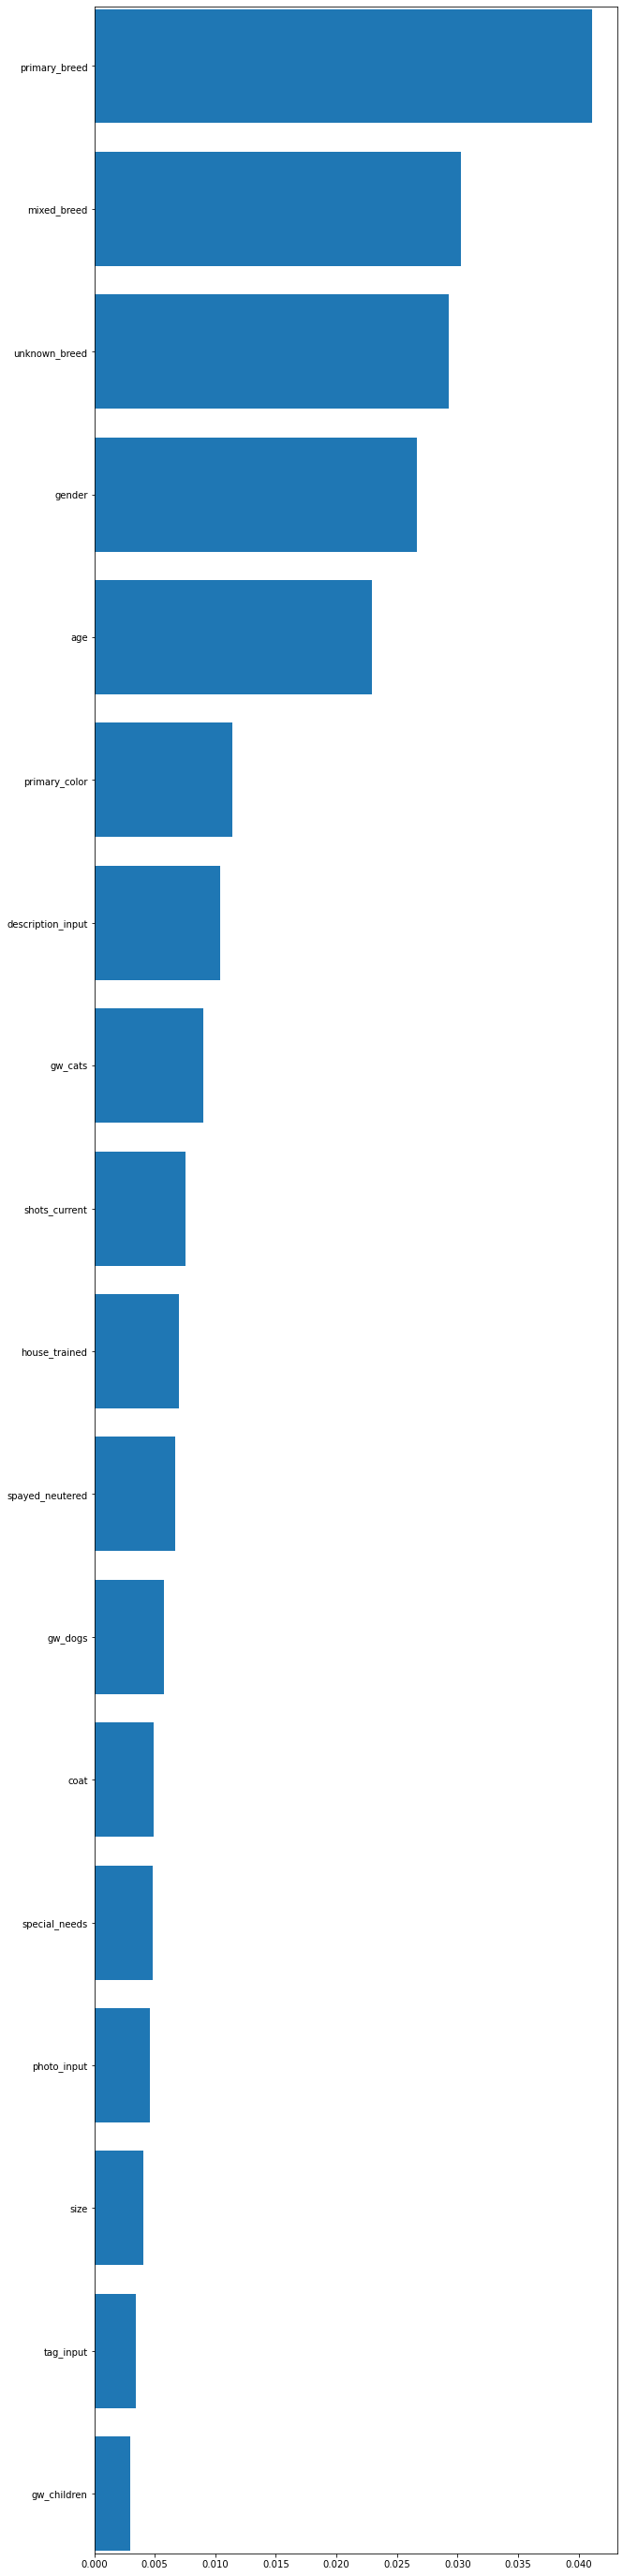

In [27]:
features = sorted(zip(X.columns, clf_scaled.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# Analysis / Classification Report

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = clf_scaled.predict(X_test)

confusion_matrix(y_true, y_pred)

array([[7672,  126,   32,   53],
       [1014,  254,   11,   27],
       [ 380,    8,   72,   14],
       [ 518,   20,    3,  170]], dtype=int64)

In [29]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7883
           1       0.62      0.19      0.30      1306
           2       0.61      0.15      0.24       474
           3       0.64      0.24      0.35       711

    accuracy                           0.79     10374
   macro avg       0.67      0.39      0.44     10374
weighted avg       0.76      0.79      0.74     10374



# Export Model

In [30]:
import joblib

# save

joblib.dump(clf_scaled, "random_forest_smaller_bins.joblib")

['random_forest_smaller_bins.joblib']